# Regularización

## Regularización Paramétrica

- Normas L1 y L2

## Conceptos básicos en Machine Learning

Se puede dividir en 4 grandes pasos:

1. Dividir:
    - Corresponde en:
        1. Dividir en vectores predictivos y vector objetivo
        2. Dividir en datos de entrenamiento y datos para testear el modelo
        - Por lo tanto, se generan 4 subconjuntos de datos.
2. Entrenar:
    - Corresponde a definir que funcion matemática/algoritmo queremos utilizar para hacer nuestro modelo predictivo
    - Con los datos de entrenamiento, se entrena a nuestro modelo

3. Predicir:
    - Una vez entrenado nuestro modelo, procedemos a hacer predicciones
    - En este caso, se utilizan los vectores predictivos del set de testeo para hacer las predicciones

4. Evaluar:
    - Cuando ya realizamos nuestra predicciones, procedemos a hacer la evaluación de nuestro modelo. Esto se realiza contrastando el vector objetivo del set de testeo, y las predicciones realizadas previamente
    - Para variables continuas, se puede utilizar el Mean Squared Error
    - Para variables categoricas, se puede utilizar una matriz de confusion

## Subajuste/Sobreajuste

Son fenómenos que se pueden observar al realizar un modelo predictivo.

- **Subajuste:** Ocurre cuando nuestro modelo es demasiado rígido, y se le hace difícil explicar las distintas variaciones que existen en los datos de entrenamiento. Lo bueno es que esto hace que sea mas generalizable a datos nuevos. Tiene un alto sesgo (rígido), explica poco a los datos de entrenamiento y tiene una alta chance de explicar mejor un nuevo set de datos.

- **Sobreajuste:** Ocurre cuando nuestro modelo se ajustó demasiado a nuestros datos de entrenamiento. Esto hace que sea muy malo para predecir nuevos datos. Tiene una alta variabilidad (demasiado flexible), explica muy bien los datos de entrenamiento, pero tiene menores chanches de explicar un nuevo set de datos

![Fitting](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)


# Elementos básicos de la regularización

Tomando como punto de partida a la regresión lineal.

- Para obtener la linea recta se utiliza el método de los mínimos cuadrados
- Esta forma permite que las estimaciones sean insesgadas y óptimas

Pero, por qué regularizar?

1. Puede que hayan parámetros que tengan un peso exagerado en la estimación
2. Puede hacer que la estimación del modelo sea mucho más óptima (sobretodo cuando hay muchas variable predictivas)
3. Permite seleccionar los mejores parámetros
4. Permite evaluar insesgadamente cuales son las mejores opciones para hacer un modelo

### Norma L1

Sintentiza la distancia entre dos vectores mediante la norma absoluta. Se conoce como Lasso.

### Norma L2

Sintentiza la distancia entre dos vectores mediante la norma euclídea. Se conoce como Ridge.

# Datos

Es un conjunto de datos que posee los precios de casas junto a sus atributos (Numero de Baños,
Inmueble, Cantidad de personas, etc...). En este caso, se quiere predecir, ocupando diversos
atributos, el precio de la casa.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from cv_error import *
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-darkgrid')

In [5]:
df = pd.read_csv('kc_house_data.csv')
df = df.drop(['zipcode', 'id', 'date'], axis=1)

In [8]:
df.shape
# Por lo tanto, hay 21613 filas y 18 columnas

(21613, 18)

In [9]:
df.info()
# Por lo tanto, hay ausencia de valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

Primero, estandarizaremos los datos para hacer el analisis mas liviano computacionalmente

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df_scaled['price'])

<AxesSubplot: xlabel='price', ylabel='Density'>

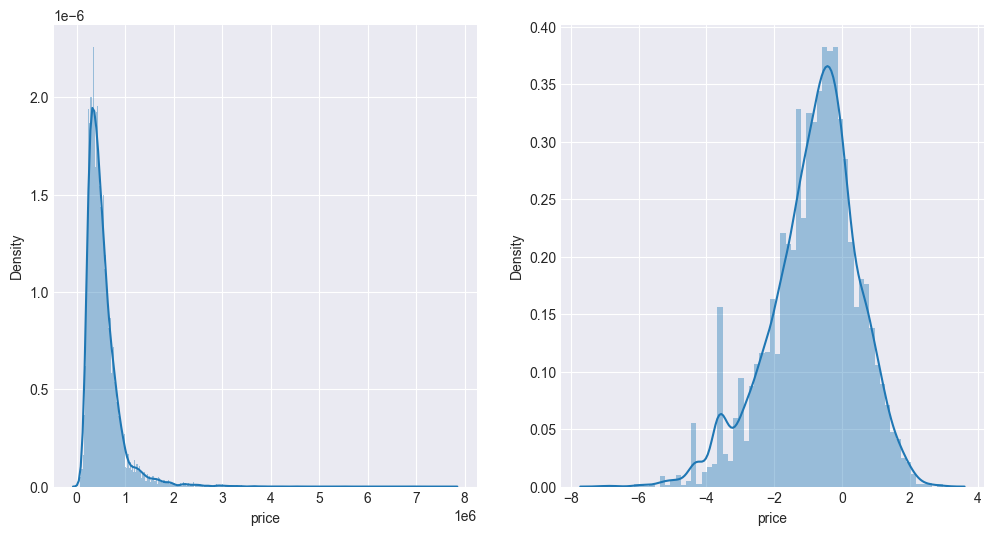

In [19]:
fig, axis = plt.subplots(1, 2)
sns.distplot(df['price'], ax=axis[0], bins='fd')
sns.distplot(df_scaled['price'], ax=axis[1], bins='fd')
# Se puede observar que al escalar y ocupar logaritmo los datos se hicieron mas normales

# Ridge

Es un hiperparametro, que esta definido arbitrariamente por el usuario, para moldear la forma
de un modelo predictivo ya realizado.

Tomando como ejemplo un modelo overfitteado (con mucha varianza, demasiado apegado a los datos
de entrenamiento), significa que los parametros asociados a cada variable tienen valores muy
altos. Por lo tanto, el valor Ridge penaliza (disminuye estos valores), para que asi el modelo
este menos overfitteado.

- Uno de los parametros es lambda, que define una superficie de penalizacion. Hay tantos lambdas
como variables independientes hayan

# Eleccion del mejor hiperparametro

La eleccion del valor de un hiperparametro carece de una aproximacion analitica (o sea, carece de
alguna formula para determinar cual es el mejor hiperparametro). Debido a lo anterior, la forma de
seleccionar el mejor hiperparametro se hace de forma iterativa. El mejor hiperparametro sera el que
genere el modelo con el mejor desempeño.